# WK03: Models

## Setup

This code imports the functions we need to run our inference pipelines

In [2]:
from PIL import Image
from transformers import pipeline
!pip install Pillow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


### Text Completion

Let's use the GPT2 model to create some text completions:

In [9]:
TEXT_GEN_MODEL = "openai-community/gpt2"

Here we define some phrases that we'll use as sentence starters:

In [10]:
SEED_TEXTS = [
  "How much wood would a woodchuck chuck if ",
  "I once knew a man from Natucket, who ",
  "To be or not to be, "
]

We'll use a Transformers pipeline object to run inference:

In [11]:
generator = pipeline("text-generation", model=TEXT_GEN_MODEL)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


Here we run the generator on all starter phrases:

In [12]:
for t in SEED_TEXTS:
  result = generator(t, max_length=24, pad_token_id=0)
  print(result[0]["generated_text"])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


How much wood would a woodchuck chuck if  he could only use a 1" thick piece of woodcut
I once knew a man from Natucket, who iced coffee for us, but then when he got to my house
To be or not to be, ices are not the sort of things that you would think of when they are called


#### Changing Model

is as easy as:

In [13]:
TEXT_GEN_MODEL = "Xenova/llama2.c-stories110M"
generator = pipeline("text-generation", model=TEXT_GEN_MODEL)

config.json:   0%|          | 0.00/601 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/825 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/72.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.
Device set to use cpu


Rerun with new model:

In [14]:
for t in SEED_TEXTS:
  result = generator(t, max_length=32, pad_token_id=0)
  print(result[0]["generated_text"])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


How much wood would a woodchuck chuck if 3 year old Timmy wanted to help. He was only three years old, but he was
I once knew a man from Natucket, who 3-years-old Jack. He was a very kind man and he always had a
To be or not to be, 3 year old Jack was playing in the park. He saw a big, red ball and he wanted to play with


One last model:

In [15]:
TEXT_GEN_MODEL = "facebook/opt-125m"
generator = pipeline("text-generation", model=TEXT_GEN_MODEL)

for t in SEED_TEXTS:
  result = generator(t, max_length=32, pad_token_id=0)
  print(result[0]["generated_text"])

config.json:   0%|          | 0.00/651 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/251M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/251M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


How much wood would a woodchuck chuck if  he had a woodchuck?
I think he would chuck it.
I once knew a man from Natucket, who  was a very nice guy, but he was a bit of a jerk. He was a bit of
To be or not to be,  I'm not sure what you mean by "not to be".  I'm not sure what you mean by "


### Text Sentiment Analysis

Define model and create some example phrases:

In [23]:
TEXT_SENT_MODEL = "joeddav/distilbert-base-uncased-go-emotions-student"

EXAMPLE_TEXTS = [
  "What a wonderful day",
  "OMG my head hurts",
  "What am I doing here?"
]

Create inference pipeline object:

In [24]:
analyzer = pipeline("sentiment-analysis", model=TEXT_SENT_MODEL)

Device set to use cpu


Run on example phrases

In [22]:
for t in EXAMPLE_TEXTS:
  result = analyzer(t)
  print(t, "->", result[0]["label"])

What a wonderful day -> joy
OMG my head hurts -> sadness
Ok then... -> realization


We can also define our pipeline like this if we want to get scores for all possible sentiments:

In [26]:
full_analyzer = pipeline("sentiment-analysis", model=TEXT_SENT_MODEL, return_all_scores=True)

Device set to use cpu
/home/vscode/.local/lib/python3.10/site-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [27]:
for t in EXAMPLE_TEXTS:
  result = full_analyzer(t)
  sorted_result = sorted(result[0], key=lambda A: A["score"], reverse=True)
  top_3_labels = [s["label"] for s in sorted_result[:3]]
  print(t, "->", top_3_labels)

What a wonderful day -> ['joy', 'optimism', 'excitement']
OMG my head hurts -> ['sadness', 'grief', 'disgust']
Ok then... -> ['realization', 'relief', 'approval']


### Image Description

New model definition/location:

In [28]:
IMAGE_CAP_MODEL = "Salesforce/blip-image-captioning-base"

A test image:

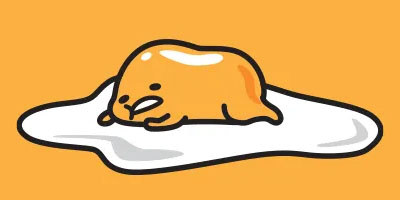

In [29]:
test_image = Image.open("./imgs/GDTM.jpg").convert("RGB")
display(test_image)

The inference object:

In [30]:
img_captioner = pipeline(task="image-to-text", model=IMAGE_CAP_MODEL)

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


Run inference:

In [31]:
result = img_captioner(test_image)
print(result[0]["generated_text"])

a cartoon character is laying on a fried egg


Other image description models:
- [`LLAVA`](https://huggingface.co/llava-hf/llava-interleave-qwen-0.5b-hf)
- [`VIT`](https://huggingface.co/nlpconnect/vit-gpt2-image-captioning)

In [3]:
MASK_MODEL = "FacebookAI/xlm-roberta-large"
generator = pipeline("text-generation", model=MASK_MODEL)

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

If you want to use `XLMRobertaLMHeadModel` as a standalone, add `is_decoder=True.`


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Device set to use cpu


In [5]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='xlm-roberta-base')

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Device set to use cpu


In [6]:
unmasker("Hello I'm a <mask> model.")

[{'score': 0.09281531721353531,
  'token': 54543,
  'token_str': 'fashion',
  'sequence': "Hello I'm a fashion model."},
 {'score': 0.0628664642572403,
  'token': 3525,
  'token_str': 'new',
  'sequence': "Hello I'm a new model."},
 {'score': 0.03473776578903198,
  'token': 92265,
  'token_str': 'French',
  'sequence': "Hello I'm a French model."},
 {'score': 0.029996929690241814,
  'token': 34923,
  'token_str': 'beautiful',
  'sequence': "Hello I'm a beautiful model."},
 {'score': 0.02966102957725525,
  'token': 17473,
  'token_str': 'sexy',
  'sequence': "Hello I'm a sexy model."}]

In [7]:
unmasker("To be or not to be that is the <mask>")

[{'score': 0.32716792821884155,
  'token': 9655,
  'token_str': 'question',
  'sequence': 'To be or not to be that is the question'},
 {'score': 0.08324585855007172,
  'token': 35166,
  'token_str': 'answer',
  'sequence': 'To be or not to be that is the answer'},
 {'score': 0.08074992895126343,
  'token': 44126,
  'token_str': 'choice',
  'sequence': 'To be or not to be that is the choice'},
 {'score': 0.029964476823806763,
  'token': 31089,
  'token_str': 'issue',
  'sequence': 'To be or not to be that is the issue'},
 {'score': 0.02911044843494892,
  'token': 26866,
  'token_str': 'matter',
  'sequence': 'To be or not to be that is the matter'}]

In [ ]:
DEEP_GEN_MODEL = "deepseek-ai/DeepSeek-R1"
generator = pipeline("text-generation", model=DEEP_GEN_MODEL)

config.json:   0%|          | 0.00/1.73k [00:00<?, ?B/s]